In [1]:
%matplotlib inline
import pymysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This notebook will count how many links point to EPAs for every article, what fraction and what they are.

In [2]:
creds = {'user': 'fausto', 
         'pswd': 'dapuzzo'} 

connection = pymysql.connect(host = "atriskwiki.cbprs6vpqcbz.us-west-1.rds.amazonaws.com",
                            user = creds["user"],
                            password = creds["pswd"],
                            port = 3306,
                            db = "atriskwiki",
                            charset = "utf8")

cur = connection.cursor()

In [3]:
# get EPA titles from DB to DataFrame
cur.execute("SELECT page_id, page_title FROM core WHERE page_is_ep = 1")
epas = pd.DataFrame(list(cur.fetchall()), columns = ["page_id","page_title"])

Loaded 1753359 links from batch 1
Batch 1 processed. Contains 10026 articles.
Loaded 1430706 links from batch 2
Batch 2 processed. Contains 8438 articles.
Loaded 1737063 links from batch 3
Batch 3 processed. Contains 9946 articles.
Loaded 1737651 links from batch 4
Batch 4 processed. Contains 9965 articles.
Loaded 1737738 links from batch 5
Batch 5 processed. Contains 9936 articles.
Loaded 1714561 links from batch 6
Batch 6 processed. Contains 9958 articles.
Loaded 1721621 links from batch 7
Batch 7 processed. Contains 9957 articles.
Loaded 1301935 links from batch 8
Batch 8 processed. Contains 7613 articles.


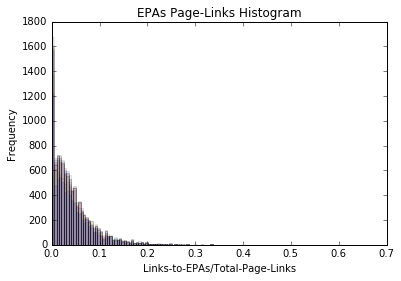

In [13]:

for i in range(1,9):
    batchNum = int(i)
    # get page_links from csv
    p_links = pd.read_csv("pl_nepa_Batch{}.csv".format(batchNum))
    print("Loaded {} links from batch {}".format(len(p_links), batchNum))
    # Create list of boolean variables that check if the link is an EPA
    bolean = list(p_links["pl_title"].isin(set(epas["page_title"])))
    # Put it in a DataFrame
    isin_epa = pd.DataFrame(bolean, index=p_links.index, columns=["isin_epa"])
    # merge p-links with isin-epa
    link_tot = pd.merge(p_links, isin_epa, left_index = True, right_index = True, how = 'outer')
    # count links-to-EPAs and make a dataframe
    perarticle = link_tot.groupby("pl_from")
    link_quanti = pd.DataFrame(perarticle["isin_epa"].aggregate(np.sum))
    # make a dataframe of the total-counts of links
    link_pl_tot = pd.DataFrame(perarticle["isin_epa"].count())
    # append number of links-to-EPAs to total-counts 
    link_pl_stats = pd.merge(link_pl_tot, link_quanti, left_index = True, right_index = True, suffixes=('_tot','_epas'))
    # Calculate ratio and make dataframe of it
    ratio = list(link_pl_stats["isin_epa_epas"] / link_pl_stats["isin_epa_tot"])
    df_ratio = pd.DataFrame(ratio, index=link_pl_stats.index, columns=["ratio"])
    # append the ratio column to a new dataframe
    link_pl_stats_ratio = pd.merge(link_pl_stats, df_ratio, left_index = True, right_index = True)
    # rename columns
    link_pl_stats_ratio.columns = ["pl_count", "is_epa", "fraction"]
    # Save dataframe to file
    #link_pl_stats_ratio.to_csv('pl_stats_nepa_batch{}.csv'.format(batchNum), encoding="utf-8")
    print("Batch {} processed. Contains {} articles.".format(batchNum, len(link_pl_stats_ratio)))
    # Plotting and saving distribution of ratios
    bins = np.linspace(0, 1, 200)
    plt.hist(link_pl_stats_ratio["fraction"], bins, alpha = 0.1)
    plt.title("EPAs Page-Links Histogram")
    plt.xlabel("Links-to-EPAs/Total-Page-Links")
    plt.ylabel("Frequency")
    plt.xlim(0,0.7)
    #plt.savefig('pl_stats_nepa_batch{}.pdf'.format(batchNum))

Not the prettiest code, very redundant but useful.

(0, 0.7)

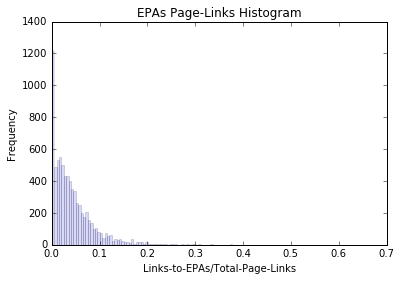

In [12]:
    bins = np.linspace(0, 1, 200)
    plt.hist(link_pl_stats_ratio["fraction"], bins, alpha = 0.15)
    plt.title("EPAs Page-Links Histogram")
    plt.xlabel("Links-to-EPAs/Total-Page-Links")
    plt.ylabel("Frequency")
    plt.xlim(0,0.7)

======================================================

Here we will plot how Edit-protection relates to number of internal links pointing to EPAs.

In [15]:
df_nepa = pd.read_csv("pl_stats_nepa_batch1.csv")
df_epa = pd.read_csv("pl_stats_epa.csv")

In [17]:
df_nepa[:3]

,pl_from,pl_count,is_epa,fraction
0,615,1760,28.0,0.015909
1,734,476,13.0,0.027311
2,1019,1084,36.0,0.033210


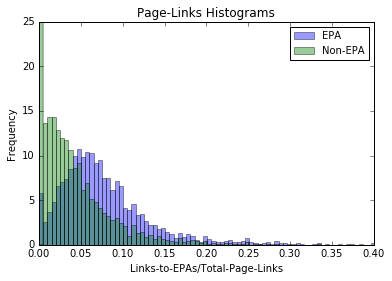

In [25]:
bins = np.linspace(0, 1, 200)
plt.hist(df_epa["fraction"], bins, alpha = 0.4, label= 'EPA', normed = True)
plt.hist(df_nepa["fraction"], bins, alpha = 0.4, label= 'Non-EPA', normed = True)
plt.title("Page-Links Histograms")
plt.xlabel("Links-to-EPAs/Total-Page-Links")
plt.ylabel("Frequency")
plt.ylim(0,25)
plt.xlim(0,0.4)
plt.legend(prop={'size': 10})

======================================================

Here instead we plot the total number of links for the two kind of articles 

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
df_nepa = pd.read_csv("pl_stats_nepa_batch1.csv")
df_epa = pd.read_csv("pl_stats_epa.csv")

In [6]:
df_epa[:3]

,pl_from,pl_count,is_epa,fraction
0,25,672,23.0,0.034226
1,290,193,10.0,0.051813
2,307,1508,84.0,0.055703


AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xscale'

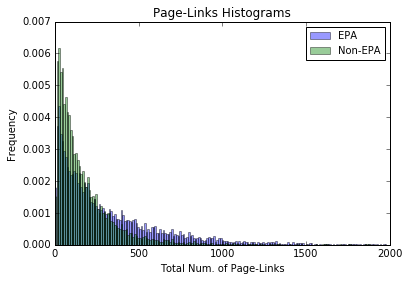

In [10]:
import numpy as np
bins = np.linspace(0, 2000, 200)
plt.hist(df_epa["pl_count"], bins, alpha = 0.4, label= 'EPA', normed = True)
plt.hist(df_nepa["pl_count"], bins, alpha = 0.4, label= 'Non-EPA', normed = True)
plt.title("Page-Links Histograms")
plt.xlabel("Total Num. of Page-Links")
plt.ylabel("Frequency")
#plt.ylim(0,25)
#plt.xlim(0,0.4)
plt.legend(prop={'size': 10})

In [ ]:
# check saved csv
vediamo = pd.read_csv('pl_stats_epa.csv')
vediamo[:3]

In [ ]:
# ids = df.index[df["page_title"].isin(["Alzheimer's_disease"])]   #I'm proud of myself!!

In [ ]:
# because this returns a SettingWithCopyWarning, I should maybe try and create a df and merge it to the existing one
link1["isin_epa"]=list(link1["pl_title"].isin(set(df_try["page_title"])))